# Mean field Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& -\frac{1}{2N}\sum_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, since the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{1}{2N}(S^z)^2 - h_0\cos{(\omega t )}S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{N}{2} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& -\frac{1}{2} s^2_i \delta_{ij},\nonumber\\
h_0 &\rightarrow& -\frac{1}{2}s^2\\
\left(h_1\right)_{ij} &\approx& \frac{1}{2}\sqrt{\frac{1}{4} - s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
h_1 &\rightarrow& \sqrt{\frac{1}{4} - s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

In [ ]:
from floquet_spectrum import *
import numpy as np
N=3

s = -0.5 + (1./N) * np.arange(N)

h0 = np.diagflat(-0.5 * (N * s)**2)

h1 = 0.0

omega = 40.0
amps = np.linspace(60.0, 60.3, 4)
dc = 0.1
params = {"omega": omega, "amps": amps, "dc": dc, "hamilt": (h0, h1)}
output = run_floquet(params)

# Mahbub's work is below-

In [ ]:
## Mahbub added here 'h1' part of the hamiltonian matrix

from floquet_spectrum import *
import numpy as np
import matplotlib.pyplot as plt

start =time.time()

N = 6
nprocs=N

s = -0.5 + (1./N) * np.arange(N)

h0 = np.diagflat(-0.5 * (N * s)**2)

def delta_func(x,y):
    if ( x == y ):
        return 1.0
    else:
        return 0.0
    

sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
h1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)

omega = 40.0
amps = np.linspace(10.0,70, 50)
dc = 0.1
params = {"omega": omega, "amps": amps, "dc": dc, "hamilt": (h0, h1)}
output = run_floquet(params)

print("time taken",time.time() - start,"second")

# Lets plot it

ampp = (np.ones((N,len(amps)))*amps).T
#plt.figure(figsize=(12,6))

for i in np.arange(len(amps)):
    plt.scatter(4*ampp[i]/omega,np.log(output[i][1]) * (-1j * omega/2 * np.pi),color='blue', marker='.', s= 0.8)

title = "floquet dynamics for N_"+ str(N)
plt.title(title)
plt.xlabel("4h/w")
plt.ylabel("phase function")
#plt.savefig("flq_mf.jpeg",dpi=400)
plt.show()

### Some Observations

# No module named 'skcuda'
# Cannot import scikit-cuda. Fall back to scipy.linalg
time taken 2.9119460582733154 second
Here we plot all the available the eignen values i.e. 
  phase function which corresponds to N for each h


/home/mahi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


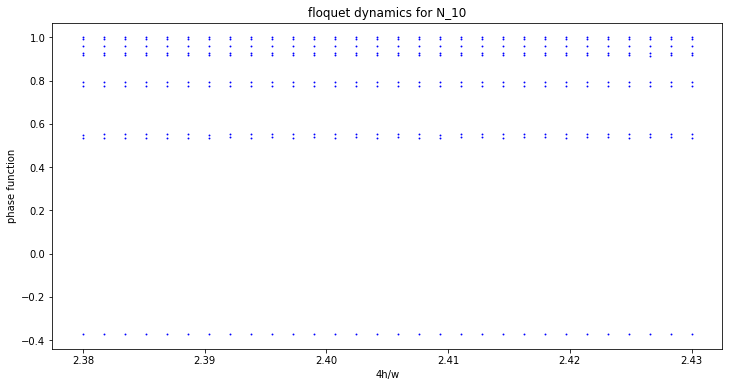

 Now we focus on the variation on phase fucntion 
 through out different specific eigen func paths


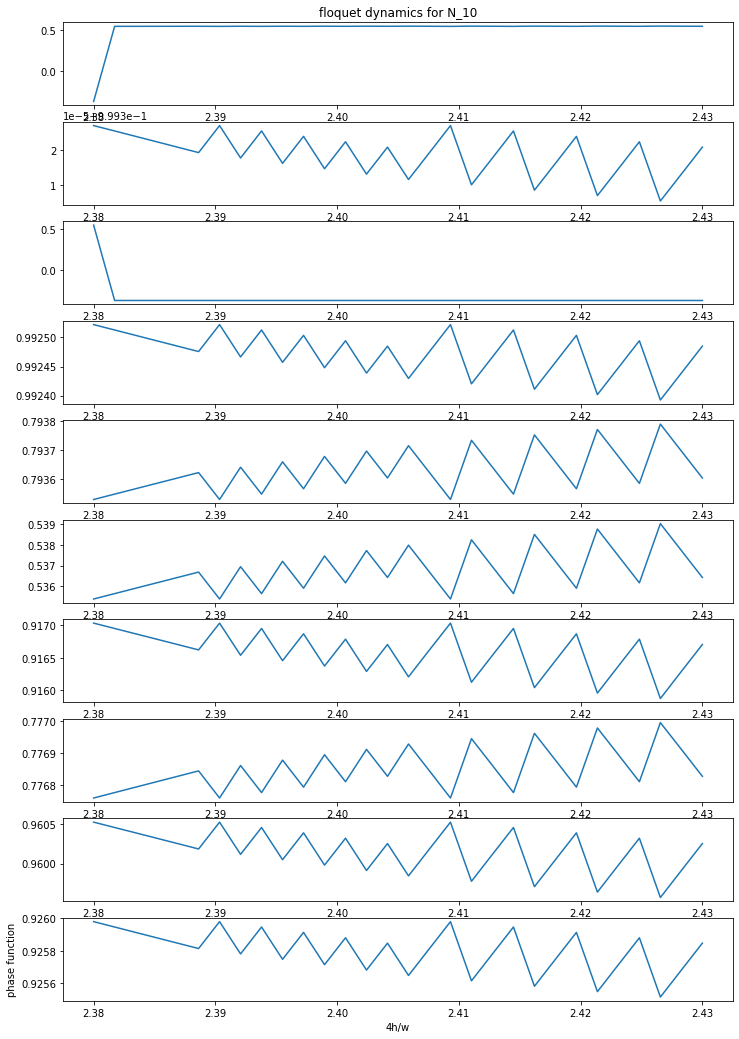

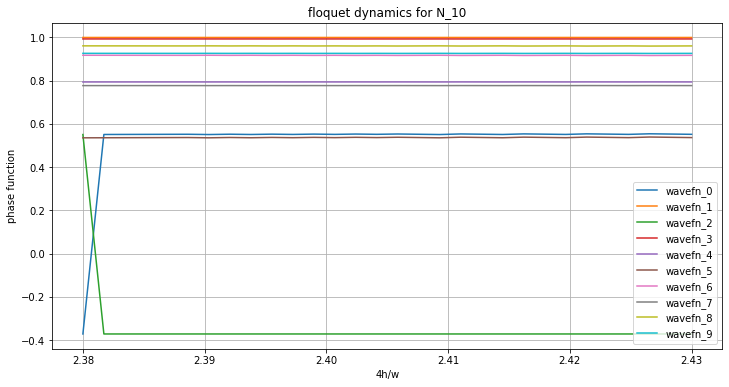

In [1]:


################################################################################################

from floquet_spectrum import *
import numpy as np
import matplotlib.pyplot as plt

start =time.time()

N = 10
s = -0.5 + (1./N) * np.arange(N)

h0 = np.diagflat(-0.5 * (N * s)**2)

def delta_func(x,y):
    if ( x == y ):
        return 1.0
    else:
        return 0.0
    
delta_matrix = np.zeros((N,N))
for i in np.arange(N):
    for j in np.arange(N):
        delta_matrix[i][j] = delta_func(i+1,j) + delta_func(i-1,j)

h1 = 0.5 * np.sqrt(0.25*N*N - (N * s)**2) * delta_matrix

omega = 40.0
amps = np.linspace(23.8,24.3,30)
dc = 0.1
params = {"omega": omega, "amps": amps, "dc": dc, "hamilt": (h0, h1)}
output = run_floquet(params)

print("time taken",time.time() - start,"second")


################################################################################

print("Here we plot all the available the eignen values i.e. \n  \
phase function which corresponds to N for each h")

################################################################################
plt.figure(figsize=(12,6))
ampp = (np.ones((N,len(amps)))*amps).T

for i in np.arange(len(amps)):
    plt.scatter(4*ampp[i]/omega,output[i][1],color='blue', marker='o', s= 0.8)
title = "floquet dynamics for N_"+ str(N)
plt.title(title)
plt.xlabel("4h/w")
plt.ylabel("phase function")
#plt.savefig("flq_mf.jpeg",dpi=400)
plt.show()

################################################################################
# work on the specific orthonormal path 

print(" Now we focus on the variation on phase fucntion \n \
through out different specific eigen func paths")

################################################################################
evecs_path = np.zeros(N) + 1j * np.zeros(N)
evecs_phasefn = np.zeros(len(amps))
prob = np.arange(len(amps))


fig, axs = plt.subplots(N, 1, figsize=(12,18))

plt.figure(figsize=(12,6))
lastplot = N - 1
title = "floquet dynamics for N_"+ str(N)
axs[0].set_title(title)

for i in np.arange(N):
    evecs_path = output[0][2][i]
    evecs_phasefn[0]= output[0][1][i].real
    label = 'wavefn_' + str(i)
    
    for j in np.arange(1,len(amps)):
        prob = list(map(lambda x:np.dot(np.conjugate(evecs_path/np.linalg.norm(evecs_path)).T,x/np.linalg.norm(x)),output[j][2]))
        mm = prob.index(max(prob))
        evecs_path = output[j][2][mm]
        evecs_phasefn[j] = output[j][1][mm].real
    
    axs[i].plot(4 * amps/omega,evecs_phasefn)
    plt.plot(4 * amps/omega,evecs_phasefn, label = 'wavefn_' + str(i))
    
    

axs[lastplot].set_xlabel("4h/w")
axs[lastplot].set_ylabel("phase function")
                           
plt.legend()
plt.grid()
plt.title(title)
plt.ylabel("phase function")
plt.xlabel("4h/w")
plt.show()